# Bokeh

## Bokeh is a library for interactive visualization (including streaming or large datasets) that targets modern web browsers for presentation, and high level languages such as Python, Scala, and R for use.  -stackoverflow

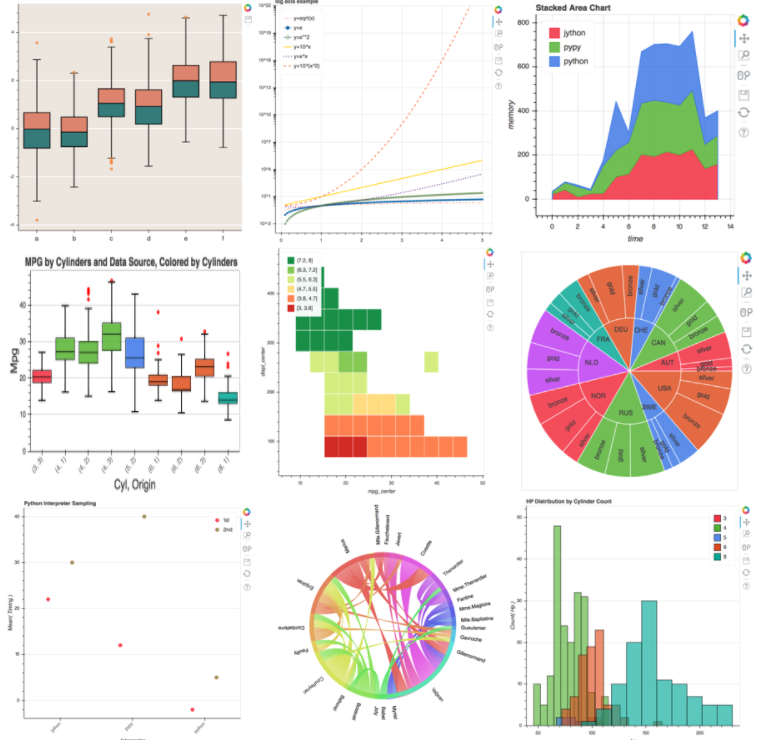

In [1]:
from ipywidgets import interact
import numpy as np
import pandas as pd
from bokeh.plotting import figure,output_file, show, output_notebook
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
from IPython.display import Image
Image("image/bokeh_examples.png")

http://bokeh.pydata.org/en/latest/

# Installation

### If you already an Anaconda user, simply run the command:

```bash
> conda install bokeh
```

### Otherwise following the instructions:

http://bokeh.pydata.org/en/latest/docs/installation.html

# First Sample Data Set: Cars

In [2]:
from bokeh.charts import Histogram

In [3]:
#Use this code when working in a juptyer notebook
output_notebook()

#Use this code to output to an html file
# output_file("layout.html")

Loading BokehJS ...

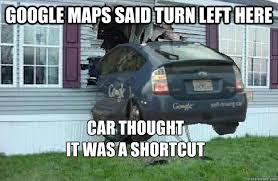

In [4]:
Image("image/car_house.jpg")

In [12]:
df_car = pd.read_csv('data/cars_multivariate.csv')
df_car= df_car[df_car['horsepower']!='?']
df_car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
title_string = "Histogram of MPG"
# title_string = "MPG grouped by Clyinders"
p = Histogram(df_car, values='mpg', color='lime',title=title_string,legend='top_right') #change 'lime' to 'cylinders'
show(p,notebook_handle=True)

# Second Sample Data Set: Red Wines

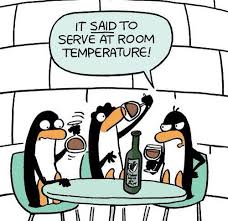

In [8]:
Image("image/penguins_wine.jpg")

In [9]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Widget boxes

## Widgets are HTML objects like buttons, and dropdown menus. They behave slightly differently to plots and and putting them in a widgetbox is necessary so that they can all work together. In fact, if you try and put a Widget in Row or Column it will be automatically put into a WidgetBox. As a result, it’s a good idea to wrap your own widgets in a``WidgetBox`` using widgetbox() as then you can be sure about how your widgets are getting arranged.

In [10]:
def version_2(col_x,col_y,size,color,size_amplify=.05,color_amp=0):
    TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,hover"
    x_ran = (df[col_x].min(), df[col_x].max())
    y_ran = (df[col_y].min(), df[col_y].max())
    x_R = df[col_x].max()- df[col_x].min()
    m = (x_R*size_amplify - x_R*0.01)/(df[size].max()- df[size].min())
    b = x_R*.01 -m*df[size].min()
    circle_size = m*df[size]+b
    m = 100/(df[color].max()-df[color].min())
    color = m*df[color] - m*df[color].min()
    colors = ["#%02x%02x%02x" % (int(r), int(color_amp), 150) for r, g in zip(50+2*color,color)]
    title_string = "{} vs {} with circle size relative to {}".format(col_x.upper(),col_y.upper(),size.upper())
    p = figure(title = title_string ,plot_height=600, plot_width=600, x_range = x_ran,y_range=y_ran,x_axis_label=str(col_x), y_axis_label= str(col_y))
    p.circle(df[col_x],df[col_y], radius= circle_size,fill_color=colors, fill_alpha=0.6, line_color=None)
    show(p,notebook_handle=True)
#     show(p)
cln_lst = list(df.columns.values)
interact(version_2, col_x = cln_lst ,col_y = cln_lst, size = cln_lst,color = cln_lst,size_amp=(0.02,.1,.01),color_amp=(0,250,1))
